In [171]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

In [172]:
# read in cleaned dataset
data = pd.read_csv("./Mental Health Questionnaire 2.0.csv")

In [173]:
data.head()

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,Your stress is related to which of the following areas?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,"If you have a mental health condition, do you feel that it interferes with your work?",How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?",Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,For some time,Evening,No,Personal,Very Often,4,Highly supportive,Sometimes,Yes,Not so easy,Never,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,For some time,Morning,Yes,Personal,Sometimes,2,Little bit,Sometimes,Yes,Not so easy,Never,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,Significant time,Evening,No,Personal,Never,2,Little bit,Never,No,Very easy,Never,No,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,Significant time,Evening,Not sure,"Home, Work, Personal",Sometimes,2,Satisfactory,Sometimes,Yes,Not so easy,Never,No,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Not sad,Afternoon,Yes,Personal,Very Often,3,Satisfactory,Often,Yes,Not so easy,Never,No,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No


Cleaning

In [174]:
data.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [175]:
data.isna().mean()


Timestamp                                                                                                               0.000000
Email address                                                                                                           0.000000
Name                                                                                                                    0.000000
Gender                                                                                                                  0.000000
Are you above 30 years of age?                                                                                          0.000000
Employment Status                                                                                                       0.000000
City                                                                                                                    0.000000
How are you feeling today?                                                                       

In [176]:
data['How comfortable are you in talking about your mental health?'].unique()


array([nan,  1.,  4.,  2.,  5.,  3.])

In [177]:
data['How comfortable are you in talking about your mental health?'].mean()


3.956896551724138

In [178]:
data['How comfortable are you in talking about your mental health?']=data['How comfortable are you in talking about your mental health?'].fillna(4.23)


In [179]:
data['How likely do you feel yourself vulnerable or lonely?'].mean()


2.9290322580645163

In [180]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(2.95)


In [181]:
data['How often do you get offended or angry or start crying ?'].mode()


0    Sometimes
dtype: object

In [182]:
data['How often do you get offended or angry or start crying ?']=data['How often do you get offended or angry or start crying ?'].fillna('Sometimes')


In [183]:
data['Has the COVID-19 pandemic affected your mental well being?'].mode()


0    Yes
dtype: object

In [184]:
data['Has the COVID-19 pandemic affected your mental well being?']=data['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')


In [185]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()


0    1.0
dtype: float64

In [186]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?']=data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)


In [187]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()


0    2-5 hours
dtype: object

In [188]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?']=data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')


In [189]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()


0    4.0
dtype: float64

In [190]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)


In [191]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()


0    No
dtype: object

In [192]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?']=data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')


In [193]:
data['Have you taken any therapy or medication in the near past for mental health?'].mode()


0    No
dtype: object

In [194]:
data['Have you taken any therapy or medication in the near past for mental health?']=data['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')


In [195]:
data['(If sad)have you been in the same mental state for the past few days?'].mode()


0    No
dtype: object

In [196]:
data['(If sad)have you been in the same mental state for the past few days?']=data['(If sad)have you been in the same mental state for the past few days?'].fillna('No')


In [197]:
data=data.drop(['Timestamp','Email address','Name','Employment Status','Prediction'],axis=1)


In [198]:
data=data.drop(['City'],axis=1)


In [199]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}


{'Gender': 3,
 'Are you above 30 years of age?': 2,
 'How are you feeling today?': 4,
 'eating and sleeping': 3,
 '(If sad)have you been in the same mental state for the past few days?': 3,
 'Is your sadness momentarily or has it been constant for a long time?': 4,
 'At what time of the day are you extremely low?': 3,
 'Has there been a sudden and huge change in your life?': 3,
 'Your stress is related to which of the following areas?': 19,
 'How frequently have you had little pleasure or interest in the activities you usually enjoy?': 4,
 'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.': 4,
 'How frequently have you been doing things that mean something to you or your life?': 4,
 'If you have a mental health condition, do you feel that it interferes with your work?': 3,
 'How easy is it for you to take medical leave for a mental health condition?': 4,
 'How often do you make use of substance abuse(e.g. smoking, alcohol)?': 4,
 'Have you ta

In [200]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}


{'Gender': ['Female', 'Male', 'Prefer not to say'],
 'Are you above 30 years of age?': ['No', 'Yes'],
 'How are you feeling today?': ['Fine', 'Good', 'Sad', 'Depressed'],
 'eating and sleeping': ['Yes', 'No', 'Maybe'],
 '(If sad)have you been in the same mental state for the past few days?': ['No',
  'Yes',
  'Maybe'],
 'Is your sadness momentarily or has it been constant for a long time?': ['For some time',
  'Significant time',
  'Not sad',
  'Long time'],
 'At what time of the day are you extremely low?': ['Evening',
  'Morning',
  'Afternoon'],
 'Has there been a sudden and huge change in your life?': ['No',
  'Yes',
  'Not sure'],
 'Your stress is related to which of the following areas?': ['Personal',
  'Home, Work, Personal',
  'None',
  'Work',
  'Work, Personal',
  'Home, Work, Financial, Personal',
  'Financial, Personal',
  'Home, Work',
  'Home, Financial, Personal',
  'Home, Personal',
  'Work, Financial, Personal',
  'Home',
  'Financial',
  'Work, Financial',
  'Home, Wo

In [201]:
{column:len(data[column].unique()) for column in data.select_dtypes('float64').columns}


{'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?': 5,
 'How likely do you feel yourself vulnerable or lonely?': 6,
 'How comfortable are you in talking about your mental health?': 6}

In [202]:
{column:len(data[column].unique()) for column in data.select_dtypes('int64').columns}


{'How confident you have been feeling in your capabilities recently.': 5}

In [203]:
{column:len(data[column].unique()) for column in data.select_dtypes('bool').columns}


{}

In [204]:
def encode_gender(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2


In [205]:
data['Gender'] = data['Gender'].apply(encode_gender)


In [206]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]


In [207]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
            df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
def nominal_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix)
        df=pd.concat([df, dummies],axis=1)
        df=df.drop(column,axis=1)
    return df


In [208]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]
nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]


In [209]:
data=binary_encode(data, columns=binary_features,positive_values=binary_positive_values)
data=nominal_encode(data,columns=nominal_features,prefixes=nominal_prefixes)
data=ordinal_encode(data,columns=ordinal_features,orderings=ordinal_orderings)


In [210]:
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,2.95,4.23,Yes,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,0,1,1.0,1,2.95,4.23,No,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.00,4.23,No,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,0,1,1.0,2,4.00,4.23,Yes,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,0,2,1.0,1,4.00,4.23,No,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,0,3,2,2,5,1,1,2,2,1,4.0,1,4.00,4.00,Yes,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,0,1,1.0,2,1.00,5.00,No,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,3,3,5.0,3,5.00,5.00,Yes,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.00,5.00,Yes,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [211]:
data.select_dtypes('object')


,Prediction_status
0,Yes
1,No
2,No
3,Yes
4,No
...,...
153,Yes
154,No
155,Yes
156,Yes


Encoding Labels

In [212]:
data=binary_encode(data,columns=['Prediction_status'],positive_values=['Yes'])
data['Prediction_status']

0      1
1      0
2      0
3      1
4      0
      ..
153    1
154    0
155    1
156    1
157    0
Name: Prediction_status, Length: 158, dtype: int64

In [213]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))


Remaining non-numeric columns: 0


In [214]:
data.tail()


,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
153,1,1,0,3,2,2,5,1,1,2,2,1,4.0,1,4.0,4.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,0,1,1.0,2,1.0,5.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,3,3,5.0,3,5.0,5.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
157,0,1,1,1,0,1,4,0,1,1,0,1,1.0,1,3.0,3.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [215]:
pd.set_option('display.max_columns', None)
# pd.set_option("max_rows", None)
data.head()


,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,2.95,4.23,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,0,1,1.0,1,2.95,4.23,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.00,4.23,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,0,1,1.0,2,4.00,4.23,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,0,2,1.0,1,4.00,4.23,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [216]:
print("Remaining missing values:", data.isna().sum().sum())


Remaining missing values: 0


In [217]:
coefs = rf

ValueError: Could not interpret input 'binary_features'

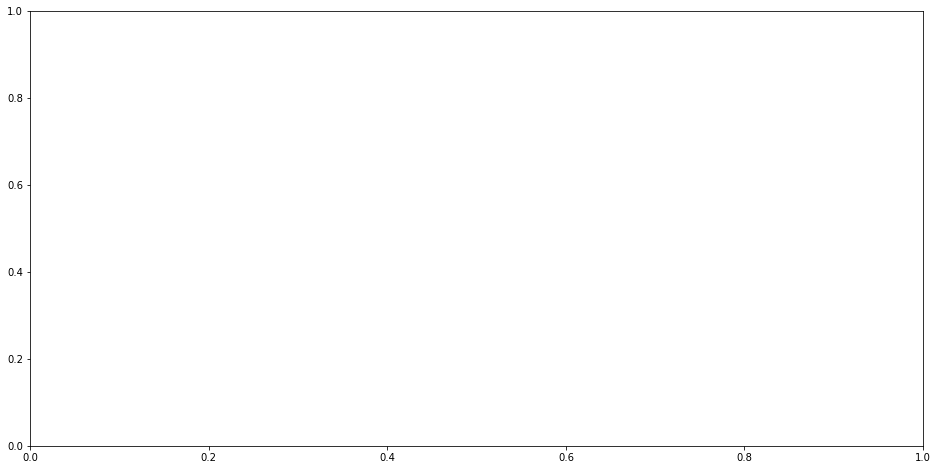

In [218]:
# Plotting the top coefficients from the standard scaling model
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=data, x='binary_features', y='target', orient='h')

# Setting the title and labels
plt.title('Features With Greatest Coefficient Values In Stochastic Gradient Descent Model')
plt.ylabel('Feature Names')
plt.xlabel('Coefficient Value')
plt.xticks(rotation=75);

Splitting/Scaling

In [219]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()
#print(X.iloc[-1,:])   #to print last row that can be used as xnew

In [220]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [221]:
X.shape


(158, 59)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)


In [223]:
y.shape


(158,)

Training

In [224]:
X_train.shape


(118, 59)

In [225]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))


Class Distribution (Positive to Negative): 52.5% / 47.5%


In [226]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
rf = LogisticRegression(C = 10000.0,random_state = 0)
rf.fit(X_train_std, y_train)

LogisticRegression(C=10000.0, random_state=0)

In [227]:
y_prediction=rf.predict(X_test)
y_prediction

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

Results

In [232]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
print("Accuracy:",accuracy_score(y_test, y_prediction))
print("Precision:",precision_score(y_test, y_prediction))
print("Recall:",recall_score(y_test, y_prediction))

Accuracy: 0.875
Precision: 0.85
Recall: 0.8947368421052632


Predicting individual's mental health

In [233]:
cm= confusion_matrix(y_test, y_prediction)  

In [236]:
cm

array([[18,  3],
       [ 2, 17]], dtype=int64)

In [239]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [240]:
cm_plot_labels = ['Depressed','Happy']

Confusion matrix, without normalization
[[18  3]
 [ 2 17]]


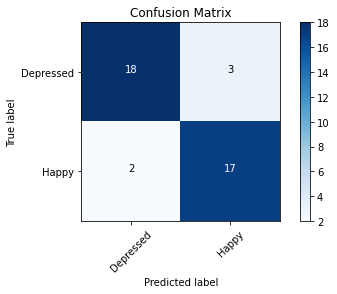

In [241]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

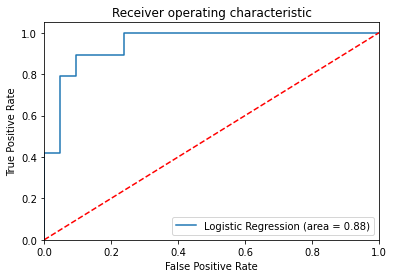

In [242]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Feature: 0, Score: 7.34076
Feature: 1, Score: 5.11184
Feature: 2, Score: 7.93843
Feature: 3, Score: 5.64853
Feature: 4, Score: 6.22959
Feature: 5, Score: 12.05164
Feature: 6, Score: 11.76739
Feature: 7, Score: 6.64120
Feature: 8, Score: 10.61126
Feature: 9, Score: 6.54207
Feature: 10, Score: 6.14697
Feature: 11, Score: 6.60253
Feature: 12, Score: 9.40181
Feature: 13, Score: 8.65589
Feature: 14, Score: 8.07667
Feature: 15, Score: 6.39482
Feature: 16, Score: 2.83186
Feature: 17, Score: 3.29203
Feature: 18, Score: 3.24413
Feature: 19, Score: 6.71082
Feature: 20, Score: -0.00000
Feature: 21, Score: 3.59904
Feature: 22, Score: 3.52369
Feature: 23, Score: 2.14999
Feature: 24, Score: 3.69921
Feature: 25, Score: 4.25076
Feature: 26, Score: 2.49892
Feature: 27, Score: 2.55526
Feature: 28, Score: 3.50258
Feature: 29, Score: 3.45521
Feature: 30, Score: 3.74777
Feature: 31, Score: 2.94714
Feature: 32, Score: 2.84905
Feature: 33, Score: 5.91301
Feature: 34, Score: 3.10776
Feature: 35, Score: 3.2836

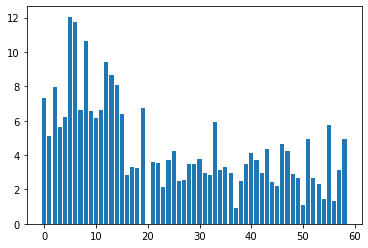

In [248]:
importance = rf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance+3.15213):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance+3.15213))], importance+3.15213)
plt.show()